## Group 10 - First Year Project 
### Data Science at ITU 
## Project 2  


# Imports

In [1132]:
import numpy as np
import pandas as pd
import folium
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import rcParams
import seaborn as sns
import calmap  

# Loading Data

In [1133]:
PATH = {}
PATH["data_raw"] = "../data/raw/"
PATH["data_interim"] = "../data/interim/"
PATH["data_processed"] = "../data/processed/"
PATH["data_external"] = "../data/external/"

SUBPATH = {}
SUBPATH["corona"] = "corona/"
SUBPATH["meta"] = "metadata/"
SUBPATH["shape"] = "shapefiles/"
SUBPATH["weather"] = "weather/"
SUBPATH["age"] = "age/"

FILENAME = {}

FILENAME["corona"] = "de_corona.csv"
FILENAME["meta"] = "de_metadata.json"
FILENAME["shape"] = "de.geojson"
FILENAME["weather"] = "weather.csv"
FILENAME["age"] = "Altersverteilung.csv"
FILENAME["age_pop"] = "Altersverteilung_Bevolkerung.csv"

corona = PATH["data_raw"]+SUBPATH["corona"]+FILENAME["corona"]
meta = PATH["data_raw"]+SUBPATH["meta"]+FILENAME["meta"]
shape = PATH["data_raw"]+SUBPATH["shape"]+FILENAME["shape"]
weather = PATH["data_raw"]+SUBPATH["weather"]+FILENAME["weather"]
age = PATH["data_external"]+SUBPATH["age"]+FILENAME["age"]
age_pop = PATH["data_external"]+SUBPATH["age"]+FILENAME["age_pop"]

In [1134]:
raw_data = {}

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

raw_data['corona'] = pd.read_csv(corona, sep='\s+', parse_dates=['date'], date_parser=dateparse)
raw_data['weather'] = pd.read_csv(weather, sep='\s+', parse_dates=['date'])
raw_data['age'] = pd.read_csv(age, sep=';')
raw_data['age_pop'] = pd.read_csv(age_pop, sep=';', decimal=',')

with open(meta, 'r', encoding='utf-8') as f:
    country_metadata = json.load(f)

# Dimension

In [1135]:
raw_data["corona"]

,date,region_code,confirmed_addition,deceased_addition
0,2020-01-02,Nordrhein-Westfalen,1,0
1,2020-01-07,Nordrhein-Westfalen,1,0
2,2020-01-09,Nordrhein-Westfalen,1,1
3,2020-01-12,Nordrhein-Westfalen,1,0
4,2020-01-14,Nordrhein-Westfalen,1,0
...,...,...,...,...
5597,2021-02-21,Rheinland-Pfalz,120,0
5598,2021-02-21,Sachsen,68,0
5599,2021-02-21,Sachsen-Anhalt,84,0
5600,2021-02-21,Schleswig-Holstein,113,0


In [1136]:
raw_data["weather"]

,date,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2020-02-13,DE-BB,76.337444,1.824290e+06,2.403341e+06,276.551573,0.003355,2.777806,4.542822
1,2020-02-13,DE-BE,76.065297,1.786373e+06,2.408182e+06,276.844633,0.003523,4.671329,4.761509
2,2020-02-13,DE-BW,80.113988,1.505760e+06,2.290158e+06,276.227143,0.008013,4.268546,4.467024
3,2020-02-13,DE-BY,81.554346,2.363013e+06,2.275361e+06,275.583053,0.005227,4.417797,3.677414
4,2020-02-13,DE-HB,87.167414,8.389756e+03,2.406940e+06,276.237452,0.007715,1.794872,4.699573
...,...,...,...,...,...,...,...,...,...
14899,2020-11-14,SE-U,93.442738,4.831112e+04,2.410483e+06,279.246340,0.000360,0.000000,2.022863
14900,2020-11-14,SE-W,94.633991,1.790715e+04,2.316636e+06,277.356327,0.002467,0.000000,2.660086
14901,2020-11-14,SE-X,91.194131,3.040221e+04,2.371160e+06,278.566463,0.000939,0.000000,2.286798
14902,2020-11-14,SE-Y,89.264026,1.481068e+04,2.359827e+06,278.493415,0.001144,0.000000,3.152586


In [1137]:
de_weather = raw_data["weather"][raw_data["weather"]['iso3166-2'].str.startswith('DE')]

In [1138]:
de_weather

,date,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2020-02-13,DE-BB,76.337444,1.824290e+06,2.403341e+06,276.551573,0.003355,2.777806,4.542822
1,2020-02-13,DE-BE,76.065297,1.786373e+06,2.408182e+06,276.844633,0.003523,4.671329,4.761509
2,2020-02-13,DE-BW,80.113988,1.505760e+06,2.290158e+06,276.227143,0.008013,4.268546,4.467024
3,2020-02-13,DE-BY,81.554346,2.363013e+06,2.275361e+06,275.583053,0.005227,4.417797,3.677414
4,2020-02-13,DE-HB,87.167414,8.389756e+03,2.406940e+06,276.237452,0.007715,1.794872,4.699573
...,...,...,...,...,...,...,...,...,...
14861,2020-11-14,DE-SH,92.854723,7.043455e+05,2.429401e+06,283.769570,0.000243,0.033065,2.784840
14862,2020-11-14,DE-SL,87.575656,4.302501e+06,2.354934e+06,283.837352,0.000012,4.665761,3.050827
14863,2020-11-14,DE-SN,82.935273,2.388385e+06,2.362859e+06,283.909275,0.001199,2.795416,3.792073
14864,2020-11-14,DE-ST,85.289489,1.447632e+06,2.407647e+06,284.662583,0.000446,1.478117,2.738335


# Sanity Check

make a sanity check: are there missing values anywhere in the weather data?

In [1139]:
print(raw_data["weather"].isna().any().any())

False


In [1140]:
raw_data["weather"]["TemperatureAboveGround"] = raw_data["weather"]["TemperatureAboveGround"] - 273.15

# Filter Data

### Region names with iso3166-2 codes and population

In [1141]:
region_map = {country_metadata["country_metadata"][i]["covid_region_code"]: country_metadata["country_metadata"][i]["iso3166-2_code"] for i in range(len(country_metadata["country_metadata"]))}

raw_data["corona"]["region"] = raw_data["corona"]["region_code"].map(region_map)

corona_df_by_region = raw_data["corona"].groupby(by = "region")["confirmed_addition", "deceased_addition", ].sum().reset_index()


population_map = {country_metadata["country_metadata"][i]["iso3166-2_code"]: country_metadata["country_metadata"][i]["population"] for i in range(len(country_metadata["country_metadata"]))}

corona_df_by_region["population"] = corona_df_by_region["region"].map(population_map)

corona_df_by_region

<ipython-input-1141-bdaa05a73c1b>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corona_df_by_region = raw_data["corona"].groupby(by = "region")["confirmed_addition", "deceased_addition", ].sum().reset_index()


,region,confirmed_addition,deceased_addition,population
0,DE-BB,74955,2914,2511917
1,DE-BE,126896,2728,3644826
2,DE-BW,311152,7940,11069533
3,DE-BY,428996,12123,13076721
4,DE-HB,17485,327,682986
5,DE-HE,184434,5672,6265809
6,DE-HH,50291,1223,1841179
7,DE-MV,23436,692,1609675
8,DE-NI,159191,4104,7982448
9,DE-NW,521548,12632,17932651


# Numerical summary

## Germany corona dataset

There are 16 regions

In [1142]:
pd.Series(raw_data['corona']['region_code']).unique()

array(['Nordrhein-Westfalen', 'Berlin', 'Saarland', 'Bayern',
       'Niedersachsen', 'Mecklenburg-Vorpommern', 'Brandenburg',
       'Baden-Württemberg', 'Hessen', 'Rheinland-Pfalz',
       'Schleswig-Holstein', 'Hamburg', 'Bremen', 'Sachsen', 'Thüringen',
       'Sachsen-Anhalt'], dtype=object)

### Daily registered cases in Germany

In [1143]:
raw_data["corona"].describe()

,confirmed_addition,deceased_addition
count,5602.000000,5602.000000
mean,426.786862,12.121028
std,831.095886,25.823844
min,1.000000,0.000000
25%,18.000000,0.000000
50%,95.000000,1.000000
75%,396.000000,10.000000
max,6809.000000,213.000000


In [1144]:
rcParams['figure.figsize'] = 25,4;

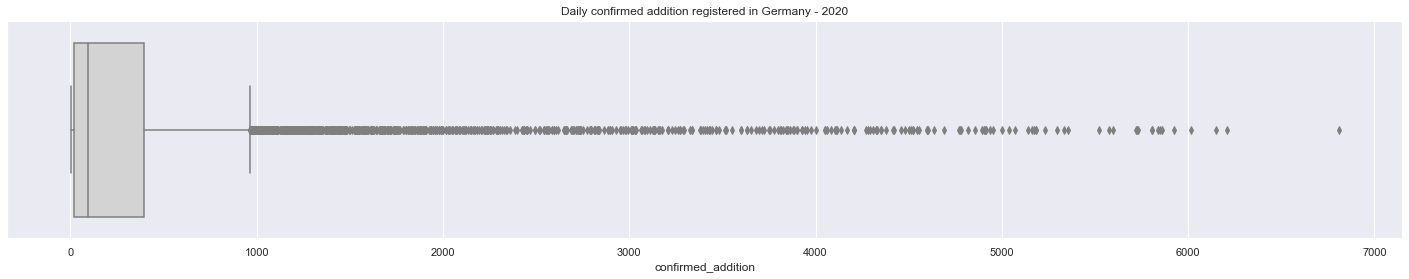

In [1145]:
deCorona_confirmed = raw_data['corona']['confirmed_addition']
sns.boxplot(deCorona_confirmed, color='lightgray').set_title('Daily confirmed addition registered in Germany - 2020');
# figure size in inches


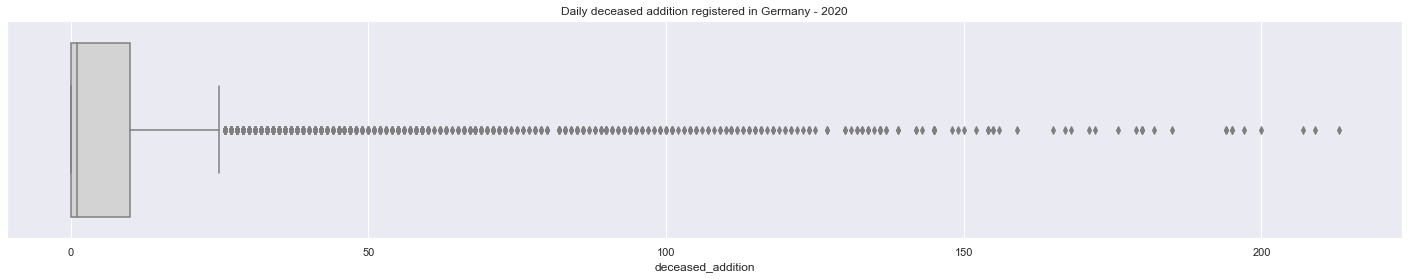

In [1146]:
deCorona_deceased = raw_data['corona']['deceased_addition']
sns.boxplot(deCorona_deceased, color='lightgray').set_title('Daily deceased addition registered in Germany - 2020');

### 2020 - all registered cases in Germany

In [1147]:
corona_df_by_region.describe()

,confirmed_addition,deceased_addition,population
count,16.000000,16.000000,1.600000e+01
mean,149428.750000,4243.875000,5.188701e+06
std,150077.793995,3898.816417,4.936479e+06
min,17485.000000,327.000000,6.829860e+05
25%,47996.500000,1220.000000,2.067654e+06
50%,87536.500000,2828.000000,3.270769e+06
75%,186028.750000,6119.000000,6.694969e+06
max,521548.000000,12632.000000,1.793265e+07


In [1148]:
rcParams['figure.figsize'] = 5, 3;

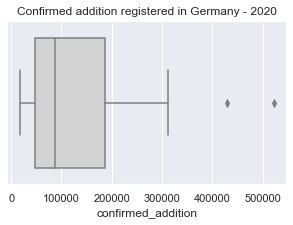

In [1149]:
CoronaSUM_confirmed = corona_df_by_region['confirmed_addition']
sns.boxplot(CoronaSUM_confirmed, color='lightgray').set_title('Confirmed addition registered in Germany - 2020');

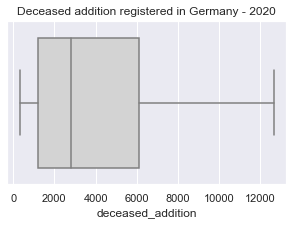

In [1150]:
CoronaSUM_deceased = corona_df_by_region['deceased_addition']
sns.boxplot(CoronaSUM_deceased, color='lightgray').set_title('Deceased addition registered in Germany - 2020');

### Number of cases per capita

In [1151]:
corona_df_by_region['confirmed/pop'] = corona_df_by_region['confirmed_addition']/corona_df_by_region['population']

In [1152]:
corona_df_by_region['deceased/pop'] = corona_df_by_region['deceased_addition']/corona_df_by_region['population']
print(corona_df_by_region)

   region  confirmed_addition  deceased_addition  population  confirmed/pop  \
0   DE-BB               74955               2914     2511917       0.029840   
1   DE-BE              126896               2728     3644826       0.034815   
2   DE-BW              311152               7940    11069533       0.028109   
3   DE-BY              428996              12123    13076721       0.032806   
4   DE-HB               17485                327      682986       0.025601   
5   DE-HE              184434               5672     6265809       0.029435   
6   DE-HH               50291               1223     1841179       0.027315   
7   DE-MV               23436                692     1609675       0.014559   
8   DE-NI              159191               4104     7982448       0.019943   
9   DE-NW              521548              12632    17932651       0.029084   
10  DE-RP              100118               2993     4084844       0.024510   
11  DE-SH               41113               1211    

In [1153]:
corona_df_by_region.groupby("region")["deceased/pop", "confirmed/pop"].describe()

<ipython-input-1153-6de09c972275>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corona_df_by_region.groupby("region")["deceased/pop", "confirmed/pop"].describe()


deceased/pop                                                        \
              count      mean std       min       25%       50%       75%   
region                                                                      
DE-BB           1.0  0.001160 NaN  0.001160  0.001160  0.001160  0.001160   
DE-BE           1.0  0.000748 NaN  0.000748  0.000748  0.000748  0.000748   
DE-BW           1.0  0.000717 NaN  0.000717  0.000717  0.000717  0.000717   
DE-BY           1.0  0.000927 NaN  0.000927  0.000927  0.000927  0.000927   
DE-HB           1.0  0.000479 NaN  0.000479  0.000479  0.000479  0.000479   
DE-HE           1.0  0.000905 NaN  0.000905  0.000905  0.000905  0.000905   
DE-HH           1.0  0.000664 NaN  0.000664  0.000664  0.000664  0.000664   
DE-MV           1.0  0.000430 NaN  0.000430  0.000430  0.000430  0.000430   
DE-NI           1.0  0.000514 NaN  0.000514  0.000514  0.000514  0.000514   
DE-NW           1.0  0.000704 NaN  0.000704  0.000704  0.000704  0.000704   
DE-RP           1.0  0.000733 NaN  0.000733  0.000733  0.000733  0.000733   
DE-SH           1.0  0.000418 NaN  0.000418  0.000418  0.000418  0.000418   
DE-SL           1.0  0.000856 NaN  0.000856  0.000856  0.000856  0.000856   
DE-SN           1.0  0.001829 NaN  0.001829  0.001829  0.001829  0.001829   
DE-ST           1.0  0.001038 NaN  0.001038  0.001038  0.001038  0.001038   
DE-TH           1.0  0.001279 NaN  0.001279  0.001279  0.001279  0.001279   

                 confirmed/pop                                              \
             max         count      mean std       min       25%       50%   
region                                                                       
DE-BB   0.001160           1.0  0.029840 NaN  0.029840  0.029840  0.029840   
DE-BE   0.000748           1.0  0.034815 NaN  0.034815  0.034815  0.034815   
DE-BW   0.000717           1.0  0.028109 NaN  0.028109  0.028109  0.028109   
DE-BY   0.000927           1.0  0.032806 NaN  0.032806  0.032806  0.032806   
DE-HB   0.000479           1.0  0.025601 NaN  0.025601  0.025601  0.025601   
DE-HE   0.000905           1.0  0.029435 NaN  0.029435  0.029435  0.029435   
DE-HH   0.000664           1.0  0.027315 NaN  0.027315  0.027315  0.027315   
DE-MV   0.000430           1.0  0.014559 NaN  0.014559  0.014559  0.014559   
DE-NI   0.000514           1.0  0.019943 NaN  0.019943  0.019943  0.019943   
DE-NW   0.000704           1.0  0.029084 NaN  0.029084  0.029084  0.029084   
DE-RP   0.000733           1.0  0.024510 NaN  0.024510  0.024510  0.024510   
DE-SH   0.000418           1.0  0.014193 NaN  0.014193  0.014193  0.014193   
DE-SL   0.000856           1.0  0.028325 NaN  0.028325  0.028325  0.028325   
DE-SN   0.001829           1.0  0.046792 NaN  0.046792  0.046792  0.046792   
DE-ST   0.001038           1.0  0.026570 NaN  0.026570  0.026570  0.026570   
DE-TH   0.001279           1.0  0.034390 NaN  0.034390  0.034390  0.034390   

                            
             75%       max  
region                      
DE-BB   0.029840  0.029840  
DE-BE   0.034815  0.034815  
DE-BW   0.028109  0.028109  
DE-BY   0.032806  0.032806  
DE-HB   0.025601  0.025601  
DE-HE   0.029435  0.029435  
DE-HH   0.027315  0.027315  
DE-MV   0.014559  0.014559  
DE-NI   0.019943  0.019943  
DE-NW   0.029084  0.029084  
DE-RP   0.024510  0.024510  
DE-SH   0.014193  0.014193  
DE-SL   0.028325  0.028325  
DE-SN   0.046792  0.046792  
DE-ST   0.026570  0.026570  
DE-TH   0.034390  0.034390

### The number of days when more than 500 /1000 confirmed addition were registered by region

In [1154]:
rcParams['figure.figsize'] = 15,6;

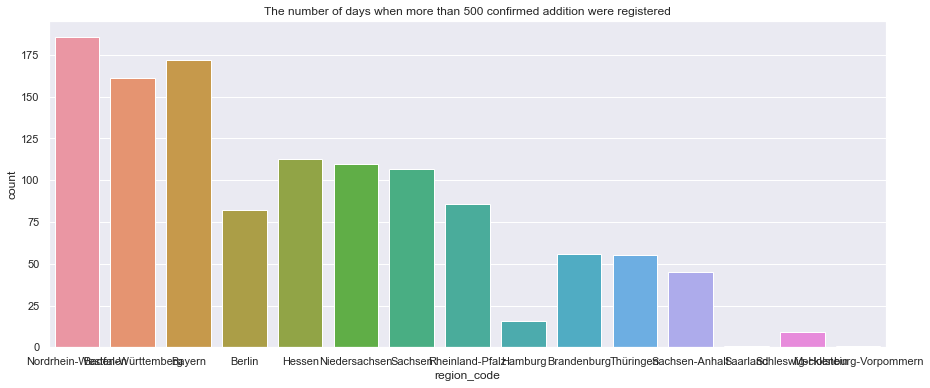

In [1155]:
sns.set(style="darkgrid")
moreThan500 = (raw_data['corona']['confirmed_addition']>500)
ax = sns.countplot(x="region_code", data=raw_data['corona'][moreThan500]).set_title('The number of days when more than 500 confirmed addition were registered');

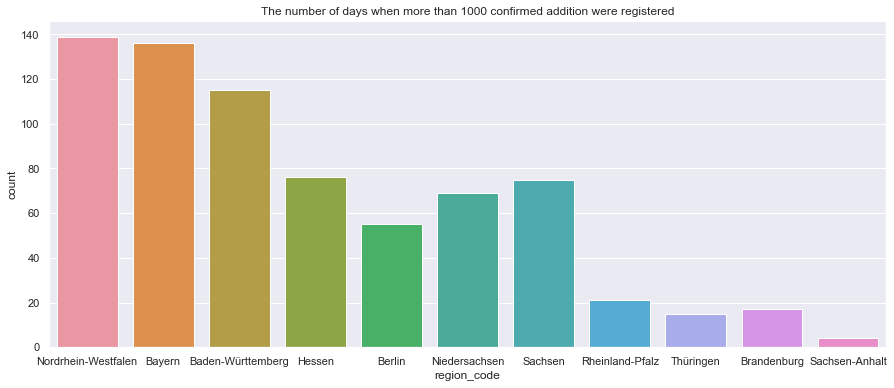

In [1156]:
sns.set(style="darkgrid")
moreThan1000 = (raw_data['corona']['confirmed_addition']>1000)
ax = sns.countplot(x="region_code", data=raw_data['corona'][moreThan1000]).set_title('The number of days when more than 1000 confirmed addition were registered')

### The number of cases by region per capita

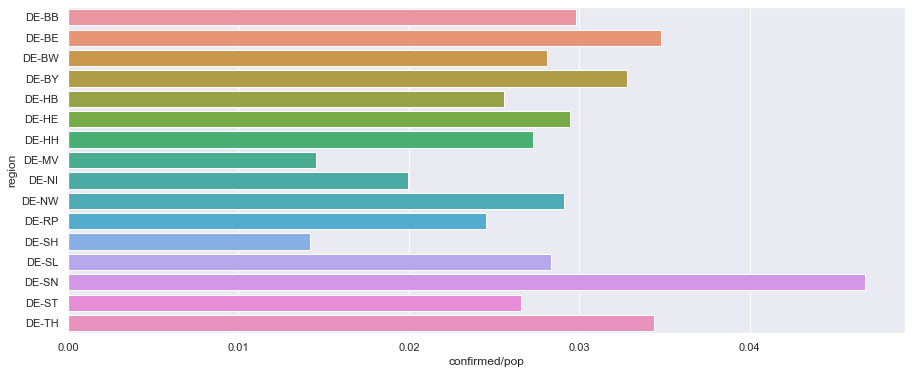

In [1157]:
ax = sns.barplot(x="confirmed/pop", y="region", data=corona_df_by_region);

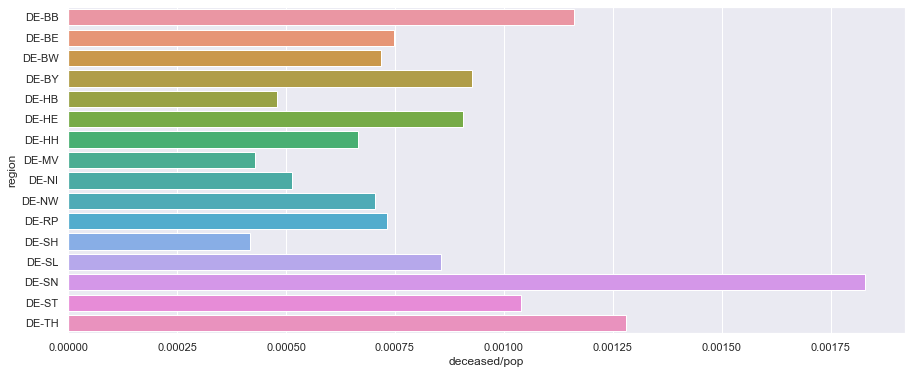

In [1158]:
ax = sns.barplot(x="deceased/pop", y="region", data=corona_df_by_region)

### The number of cases monthly in Germany

In [1159]:
#raw_data['corona'].reset_index(inplace=True)
#df.columns = ['Date','sum']
raw_data['corona'].head()
raw_data['corona']['year_month'] = raw_data['corona']['date'].dt.strftime('%Y-%m')
raw_data['corona']['year_month']

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
5597    2021-02
5598    2021-02
5599    2021-02
5600    2021-02
5601    2021-02
Name: year_month, Length: 5602, dtype: object

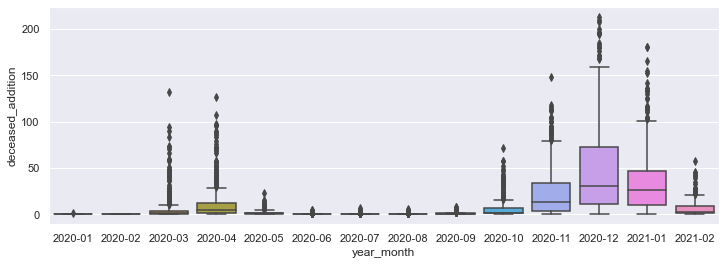

In [1160]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x= 'year_month', y='deceased_addition',data=raw_data['corona'],ax=ax).set_title("")
plt.show()

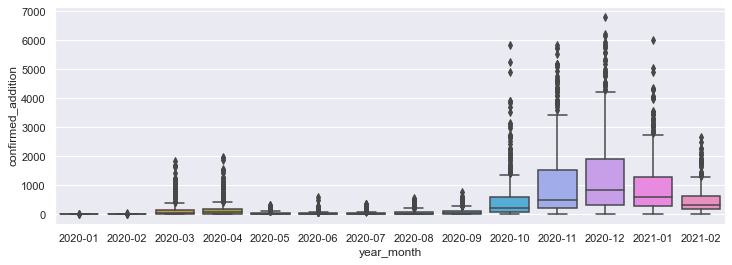

In [1161]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='year_month',y='confirmed_addition',data=raw_data['corona'],ax=ax).set_title("")
plt.show()

### Heatmaps of weather data daily over 2020  (02.13-11.14.)

In [1162]:
datetime_series = pd.to_datetime(de_weather['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df2=de_weather.set_index(datetime_index)
de_weather.drop('date', axis=1,inplace=True);

C:\Users\liter\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


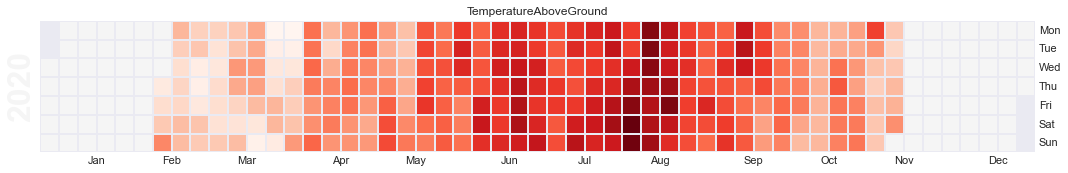

In [1163]:
calmap.calendarplot(df2['TemperatureAboveGround'])
plt.title("TemperatureAboveGround");

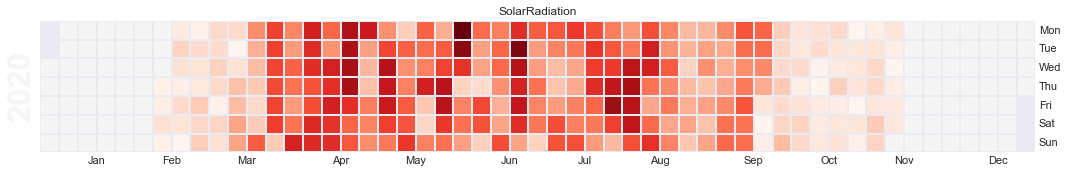

In [1164]:
calmap.calendarplot(df2['SolarRadiation'])
plt.title("SolarRadiation");

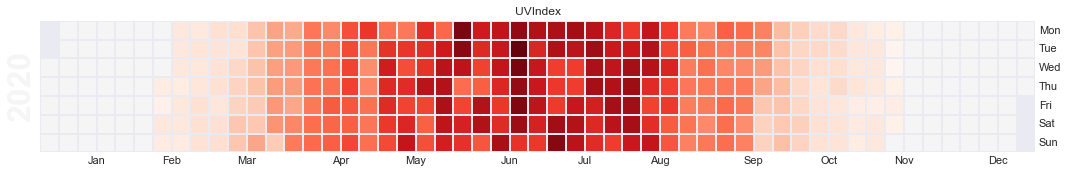

In [1165]:
calmap.calendarplot(df2['UVIndex'])
plt.title("UVIndex");

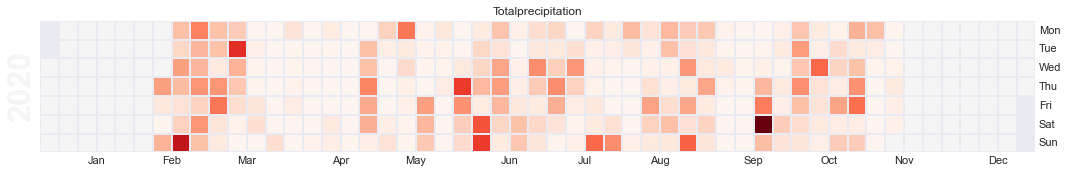

In [1166]:
calmap.calendarplot(df2['Totalprecipitation'])
plt.title("Totalprecipitation");

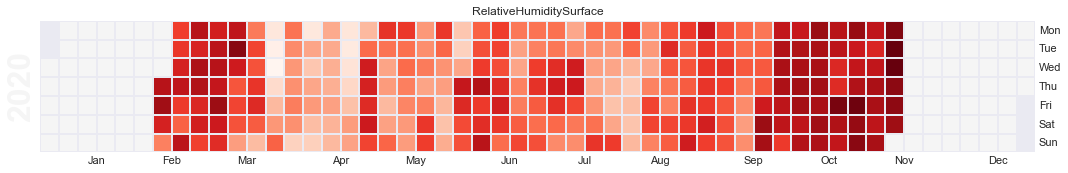

In [1167]:
calmap.calendarplot(df2['RelativeHumiditySurface'])
plt.title("RelativeHumiditySurface");

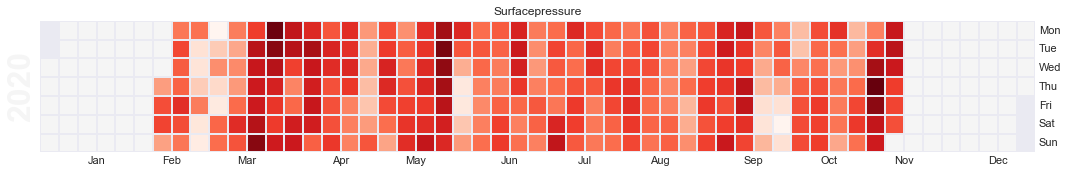

In [1168]:
calmap.calendarplot(df2['Surfacepressure'])
plt.title('Surfacepressure');

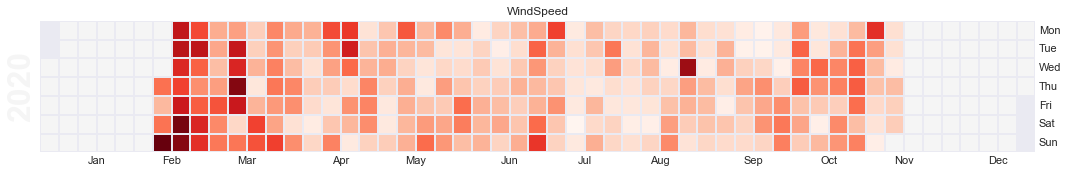

In [1169]:
calmap.calendarplot(df2['WindSpeed'])
plt.title("WindSpeed");

##  Task 4: Open question
Use the data to formulate, motivate, answer, and discuss another research question of your choice. For example, compare your country to another one in the dataset; or investigate additional variables that you could
find elsewhere (e.g. total population, population density, population demographics such as age distribution,
number of elders, etc); or identify if there are temporal patterns (is one variable more important in some
months? Are weekends different from weekdays? Etc), ..


##### The geographic spread of documented coronavirus 2 (SARS-CoV-2) infections shows homogeneity in Germany. We loaded an external data set from the website of 'Robert Koch Institut' to explore the role of age in potentially driving differencies in infection spread.
The data set is about  COVID-19 cases by age group / 100,000 inhabitants in Germany from the 17th of March 2020 to the 2nd of March 2021.  
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Altersverteilung.html

In the table, age-specific infections per 100,000 inhabitants are shown. 
We added the mean of the weekly cases by age to the table to get a quick insight into the age distribution.

In [1170]:
raw_data['age_pop']['mean'] = raw_data['age_pop'].mean(axis=1)
raw_data['age_pop'].head()

,Altersgruppe,2020_11,2020_12,2020_13,2020_14,2020_15,2020_16,2020_17,2020_18,2020_19,...,2021_1,2021_2,2021_3,2021_4,2021_5,2021_6,2021_7,2021_8,2021_9,mean
0,Gesamt,7.72,26.97,40.89,43.39,32.69,20.88,14.88,8.95,7.50,...,175.00,143.11,114.96,94.16,77.74,61.19,63.13,67.90,69.71,57.935192
1,90+,1.58,12.27,51.52,142.28,151.15,103.03,70.59,34.63,25.27,...,657.56,612.36,479.32,350.41,235.59,159.16,131.22,100.84,73.87,159.798654
2,85 - 89,2.43,14.07,47.19,92.59,91.00,59.21,43.55,20.85,16.82,...,388.99,355.16,284.56,212.94,164.98,105.90,93.49,77.25,60.75,98.456731
3,80 - 84,2.58,14.21,38.92,59.68,52.12,35.85,24.95,13.72,9.08,...,232.98,203.08,161.73,127.34,95.47,69.79,60.77,54.09,46.47,59.921154
4,75 - 79,2.94,14.76,36.30,46.10,33.90,22.03,15.14,9.05,7.09,...,134.89,111.31,88.25,72.90,57.04,43.91,44.22,40.84,34.62,38.320577


In [1171]:
 raw_data['age_pop']['mean'].describe()

count     20.000000
mean      62.162125
std       29.404713
min       23.015769
25%       40.729519
50%       60.668846
75%       67.935962
max      159.798654
Name: mean, dtype: float64

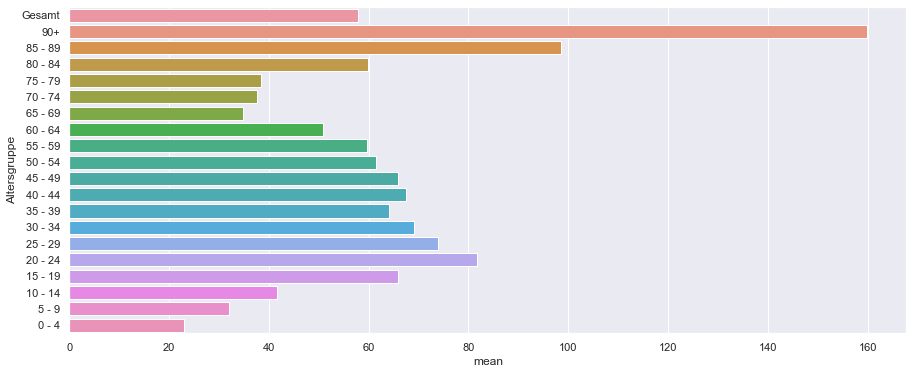

In [1172]:
ax = sns.barplot(x="mean", y="Altersgruppe", data=raw_data['age_pop'])

By calculating the mean of the weekly cases by age groups we can see that elderly people become more likely infected than younger people or kids. Especially people above 90.

Now the temporal distribution of cases according to age is to be analyzed. That needed some changes in the data structure.

In [1173]:
df_T = raw_data['age_pop'].T
modified = df_T.reset_index()
new_header = modified.iloc[0] #grab the first row for the header
modified = modified[1:] #take the data less the header row
modified.columns = new_header #set the header row as the df header
modified.rename(columns={"Altersgruppe":"date"}, inplace=True)
modified = modified.drop([53])
modified['date'] = modified['date'].astype(str) + '_2' #2 means Tuesday
modified['date'] =  pd.to_datetime(modified['date'], format='%Y_%W_%w')

modified


,date,Gesamt,90+,85 - 89,80 - 84,75 - 79,70 - 74,65 - 69,60 - 64,55 - 59,...,45 - 49,40 - 44,35 - 39,30 - 34,25 - 29,20 - 24,15 - 19,10 - 14,5 - 9,0 - 4
1,2020-03-17,7.72,1.58,2.43,2.58,2.94,3.92,4.88,7.56,11.15,...,14.05,11.53,10.34,9.73,10.76,7.03,4.65,2.73,1.5,0.91
2,2020-03-24,26.97,12.27,14.07,14.21,14.76,16.85,18.25,28.28,38.58,...,39.84,36.73,33.18,37.28,39.49,31.44,13.73,6.83,4.53,3.61
3,2020-03-31,40.89,51.52,47.19,38.92,36.3,36.12,33.9,44.74,53.33,...,55.43,47.42,45.05,48,53.07,49.26,23.81,10.24,6.68,6.41
4,2020-04-07,43.39,142.28,92.59,59.68,46.1,38.57,34.82,49.26,54.46,...,51.58,47.02,41.69,44,49.01,48.69,27.34,11.61,7.86,6.87
5,2020-04-14,32.69,151.15,91,52.12,33.9,28.58,22.99,31.8,38.72,...,36.45,34.12,31.25,31.88,38.09,37.65,21.73,8.18,6.33,5.96
6,2020-04-21,20.88,103.03,59.21,35.85,22.03,17.17,13.62,19.25,23.24,...,22.26,20.9,18.57,21.89,25.56,26.78,14.52,6.37,4.37,4.06
7,2020-04-28,14.88,70.59,43.55,24.95,15.14,11.54,10.37,11.93,15.72,...,14.98,14.2,14.44,16.52,19.67,20.85,10.18,5.08,4.11,4.67
8,2020-05-05,8.95,34.63,20.85,13.72,9.05,7.48,5.47,7.17,8.91,...,8.89,9.29,8.77,10.23,13.42,12.91,6.73,3.67,3.22,3.33
9,2020-05-12,7.5,25.27,16.82,9.08,7.09,5.63,4.28,5.88,7.58,...,8.5,8.23,7.96,8.88,10.27,11.02,6.6,3.38,2.82,3.48
10,2020-05-19,5.72,17.37,11.45,7.47,4.54,3.51,3,4.25,5.34,...,6.24,7.25,6.67,7.11,7.67,9.03,4.59,3.16,2.95,2.93


In [1174]:
for column in modified:
    modified.iloc[:, 1:21] = modified.iloc[:, 1:21].astype(float)

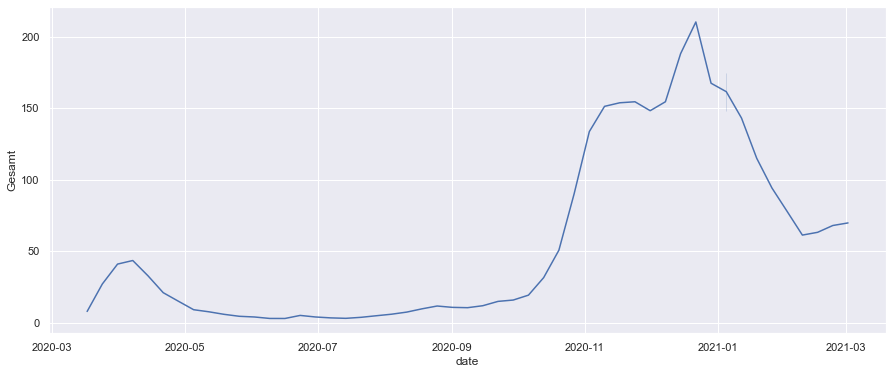

In [1175]:
rcParams['figure.figsize'] = 15,6
sns.lineplot(data=modified, x='date', y='Gesamt');

It is clear that there is a peak in the number of cases in the winter period of 2020-2021. 
Next, the distribution of this specific period will be plotted by ages.

In [1176]:
x = modified.drop(['Gesamt'], axis=1)
melt_modified = x.melt('date', var_name='age_gaps',  value_name='cases')
#melt_modified[:54]
#melt_modified['date']
mask = (melt_modified['date'].dt.month > 10)
winter = melt_modified[mask]

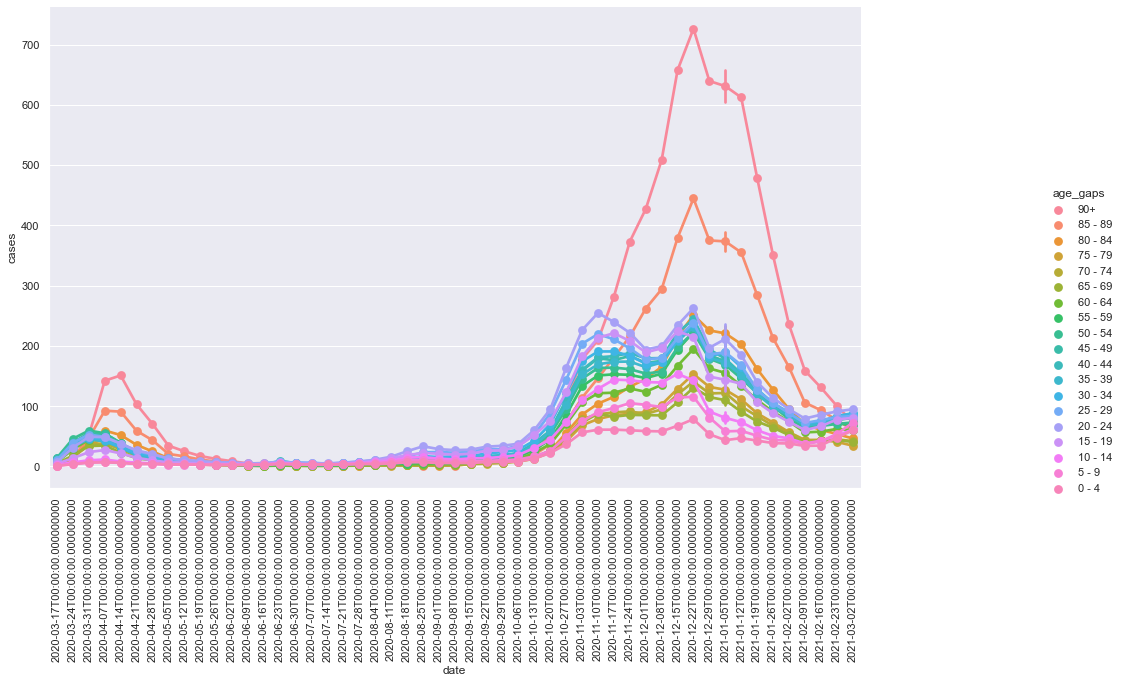

In [1180]:
g = sns.catplot(x="date", y="cases", hue='age_gaps', data=melt_modified, kind='point')
g.fig.set_size_inches(20,8)
g.set_xticklabels(rotation=90);

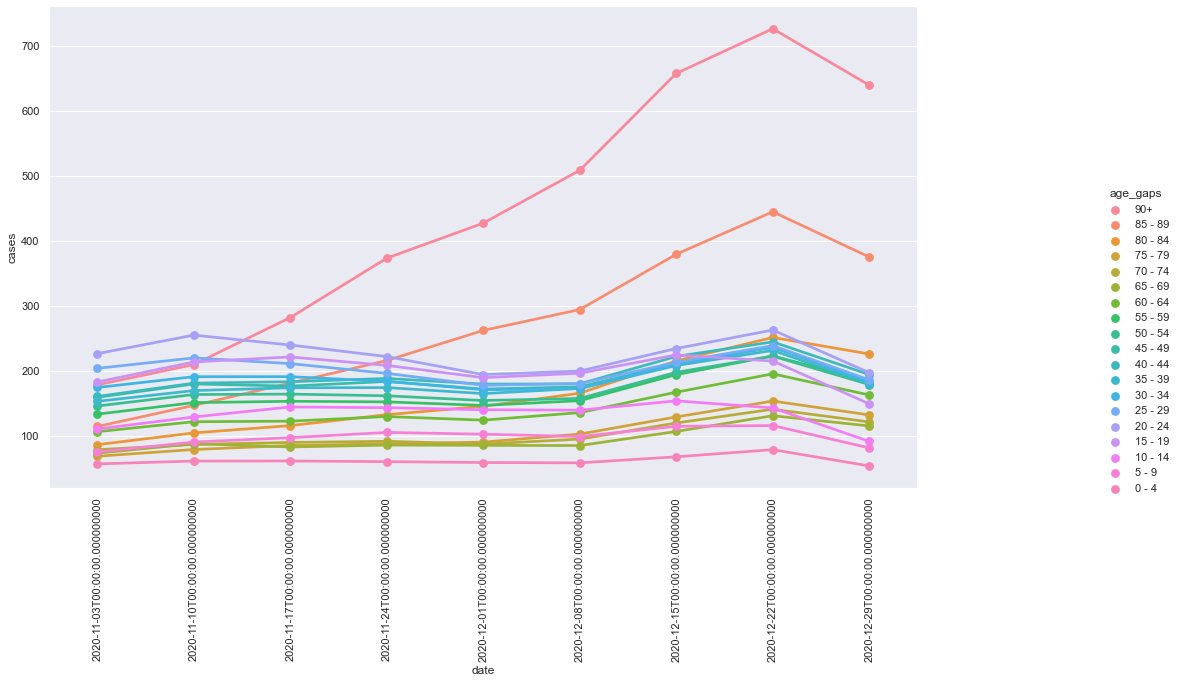

In [1179]:
g = sns.catplot(x="date", y="cases", hue='age_gaps', data=winter, kind='point')
g.fig.set_size_inches(20,8)
g.set_xticklabels(rotation=90);

It is visible that the intensities of the infections across the different age groups are moving together, when entering this worst winter period, the proportion of the infected among people above 85 are ramping up more rapidly.